<a href="https://colab.research.google.com/github/Azha00005/Data-Science-project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)
Відповідь: Про скільки книг зберігає дані датасет?

In [1]:
import pandas as pd

In [2]:
kaggle = pd.read_csv('/content/bestsellers with categories.csv')

In [6]:
kaggle.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
kaggle.shape

(550, 7)

Відповідь: 550

 А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [8]:
kaggle.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [9]:
kaggle.isna().sum()

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [10]:
kaggle['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

In [11]:
import matplotlib.pyplot as plt

(array([266., 216.,  42.,   9.,  12.,   2.,   0.,   1.,   0.,   2.]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. ]),
 <BarContainer object of 10 artists>)

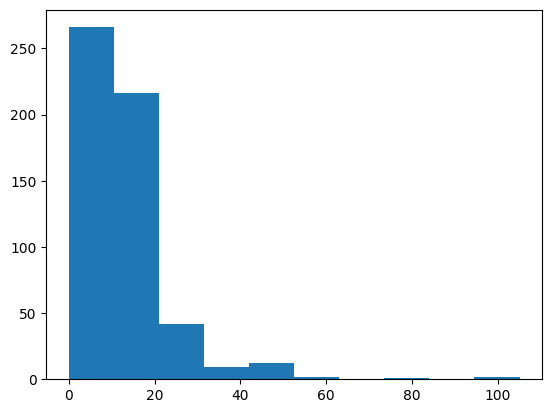

In [12]:
plt.hist(kaggle['price'])

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [13]:
print(kaggle['price'].max())

105


In [14]:
print(kaggle['price'].min())

0


In [16]:
print(kaggle['price'].mean())

13.1


In [17]:
print(kaggle['price'].median())

11.0


**Пошук та сортування даних**

Який рейтинг у датасеті найвищий? Відповідь:

In [18]:
kaggle['user_rating'].max()

4.9

Скільки книг мають такий рейтинг? Відповідь:

In [20]:
kaggle[kaggle['user_rating']==4.9].shape[0]

52

Яка книга має найбільше відгуків? Відповідь:

In [21]:
kaggle.sort_values(by='reviews', ascending=False).iloc[0]['name']

'Where the Crawdads Sing'

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:

In [28]:
top50 = kaggle[kaggle['year']==2015].sort_values(by='user_rating', ascending=False).iloc[:50]

max_price = top50.loc[top50['price'].idxmax()]['name']

max_price

'Publication Manual of the American Psychological Association, 6th Edition'

 Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

In [35]:
top2010 = kaggle[(kaggle['year']==2010) & (kaggle['genre']== 'Fiction')].sort_values(by ="user_rating",ascending=False)[:50]
top2010.shape[0]

20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

In [38]:
top2010_2011 = kaggle[(kaggle['user_rating']==4.9) & (kaggle['year'].isin([2010, 2011]))]
top2010_2011

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [46]:
sort_growth = kaggle[(kaggle['year']==2015)&(kaggle['price'] < 8)].sort_values(by=['price', 'user_rating'], ascending = [True, False])
sort_growth.tail()

,name,author,user_rating,reviews,price,year,genre
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Яка книга остання у відсортованому списку? Відповідь:

In [49]:
sort_growth.iloc[-1:].iat[0,0]

'Old School (Diary of a Wimpy Kid #10)'

**Агрегування даних та з'єднання таблиць**

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [54]:
group_agg = kaggle[['price','genre']].groupby('genre').agg(['min', 'max'])
group_agg

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [60]:
count_books = kaggle[['author', 'name']].groupby('author').agg('count')
count_books.columns = ["count"]
count_books["count"].sort_values(ascending=False).head()

,count
author,
Jeff Kinney,12
Gary Chapman,11
Rick Riordan,11
Suzanne Collins,11
American Psychological Association,10


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [57]:
mean_author= kaggle[['author', 'user_rating']].groupby('author').agg('mean')
mean_author.head()

,user_rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [65]:
complex_data = pd.concat([count_books, mean_author], axis=1)
complex_data.columns = ['count', 'mean']
complex_data.head()

,count,mean
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


**Візуалізація**

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

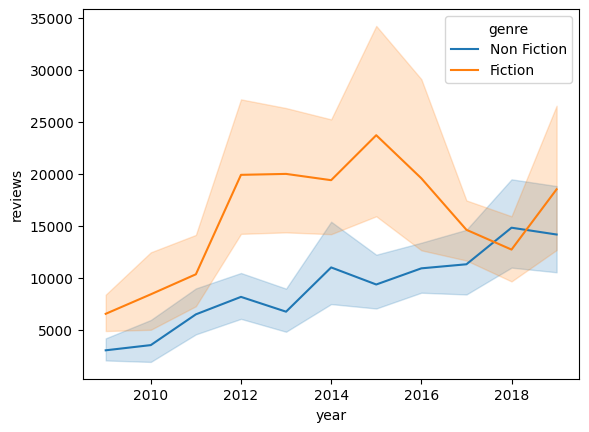

In [67]:
sns.lineplot(data=kaggle, x="year", y="reviews", hue="genre")
plt.show()

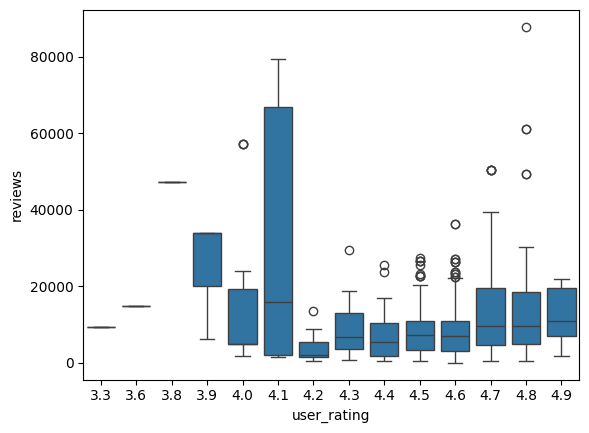

In [68]:
sns.boxplot(x="user_rating", y="reviews", data=kaggle)
plt.show()